In [34]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [19]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

C:\Users\TANMAY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
data['price'] = boston.target
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [21]:
x = data.drop(['price'],axis=1)

In [22]:
y = data['price']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 43)

In [26]:
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [27]:
pd.DataFrame(ytrain_pred, ytrain)
pd.DataFrame(ytest_pred, ytest)

,0
price,
25.0,22.606778
23.2,16.780214
20.5,20.171050
31.6,33.486764
17.6,16.736640
...,...
25.0,28.536715
33.0,23.244075
43.8,34.593981


In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

22.018613449500464


In [32]:
mse = mean_squared_error(ytrain, ytrain_pred)
print(mse)

22.039354756748445


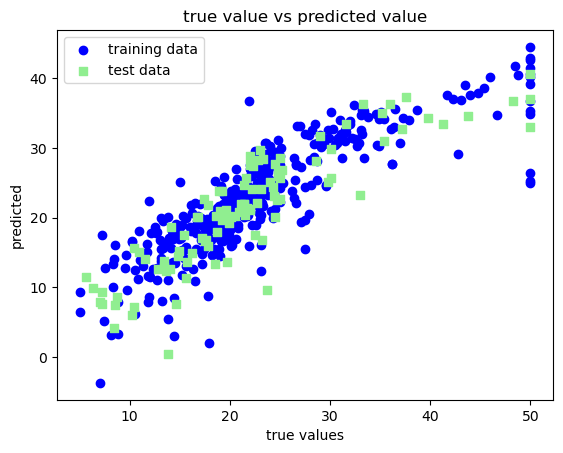

In [35]:
plt.scatter(ytrain, ytrain_pred, c='blue', marker='o', label = 'training data')
plt.scatter(ytest, ytest_pred, c='lightgreen', marker='s', label='test data')
plt.xlabel('true values')
plt.ylabel('predicted')
plt.title('true value vs predicted value')
plt.legend(loc='upper left')
plt.plot()
plt.show()